<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [49]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [50]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [51]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [52]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# **TASK 2**

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:ylabel='MEDV'>

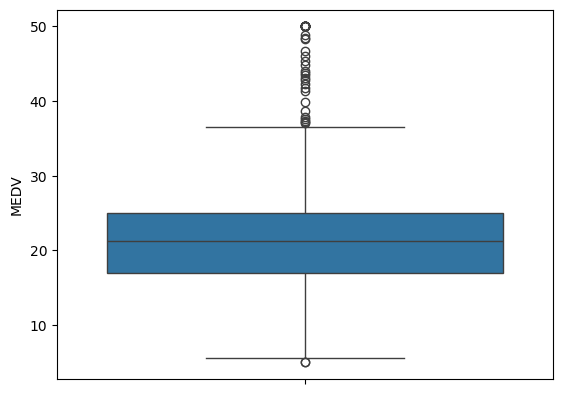

In [8]:
sns.boxplot(y="MEDV",data=boston_df)

## Provide a  bar plot for the Charles river variable

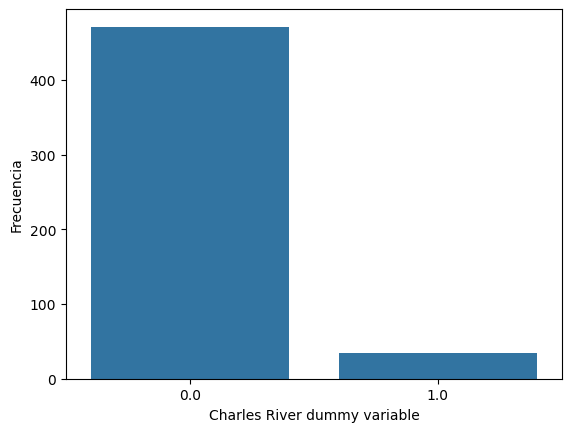

In [62]:
conteo=boston_df['CHAS'].value_counts().reset_index()
conteo.columns=['Charles River dummy variable','Frecuencia']
ax=sns.barplot(x='Charles River dummy variable',y='Frecuencia',data=conteo)

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years an >>70 years)

<AxesSubplot:xlabel='Age Group', ylabel='MEDV'>

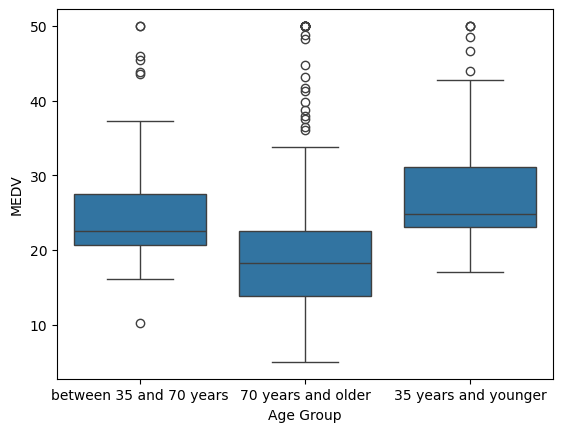

In [53]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'
sns.boxplot(x="Age Group",y="MEDV",data=boston_df) 

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

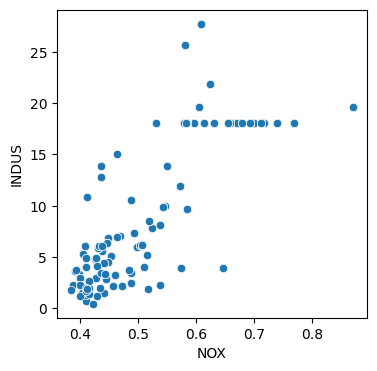

In [66]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df,ax=ax)

#### Based on the trend of the points, it is observed a positive relationship. That is, the higher the Nitric oxide concentrations, the higher the proportion of non-retail business acres per town is.

## Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Distribución de pupil to teacher ratio variable')

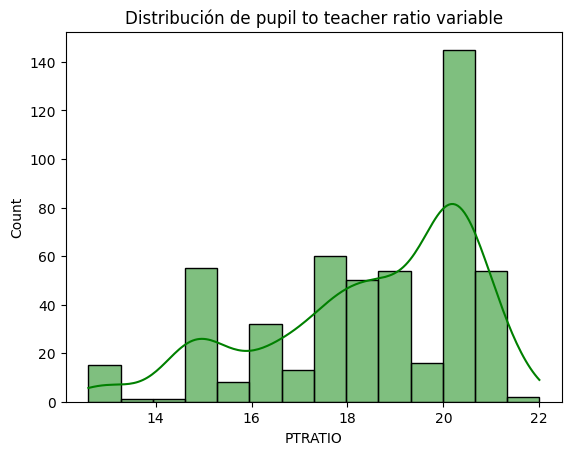

In [52]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True, color='green')
plt.title('Distribución de pupil to teacher ratio variable')

# **TASK 3**

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* $H\_0: µ\_1 = µ\_2$ There is **NO** difference in the median value of houses bounded by the Charles River and those not bordered by it.
* $H\_1: µ\_1 ≠ µ\_2$ There is a difference in the median value of houses bounded by the Charles River and those not bordered by it.

In [59]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### Since the p-value (0.003567170098137517) is <0.05, we reject the null hypothesis. That is, there is statistically significant evidence that the average value of houses differs between those bounded by the river and those not.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Test for equality of variance

In [54]:
scipy.stats.levene(boston_df[boston_df['Age Group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['Age Group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['Age Group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [56]:
lower_treintacinco = boston_df[boston_df['Age Group'] == '35 years and younger']['MEDV']
treintacinco_setenta = boston_df[boston_df['Age Group'] == 'between 35 and 70 years']['MEDV']
higher_setanta = boston_df[boston_df['Age Group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(lower_treintacinco, treintacinco_setenta, higher_setanta)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Since the p-value (1.7105011022702984e-15) is <0.05, we reject the null hypothesis. That is, there is statistically significant evidence that at least one of the means differs.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

*   $H\_0:$ There is **NO** relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [40]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Since the p-value (7.913361061210442e-98) is <0.05, we reject the null hypothesis. That is, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0:$ The DIS coefficient is equal to 0 (no impact). 
*   $H\_1:$ The DIS coefficient is different from 0 (there is an impact).

In [61]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.21e-08
Time:                        11:33:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since the p-value (0.000) is <0.05, we reject the null hypothesis. That is, the weighted distance to the five Boston employment centres (DIS) has a statistically significant effect on the average home value.